# Aparatment Prices
Using the file "Booli_sold.csv" we can analyze the data on sales of apartments in Ekhagen. 

1. Calculate the price per square meter (ppsqm) for each aparment sold. Ie. add a new variable to your table containing the data representing the price per square meter. 
2. Rank the top 5 most expensive appartments w.r.t ppsqm. Present this in a table. Hint: Use a sort function.
3. What is the avereage ppsqm in Ekhagen?
4. Highlight an aspect of the data that you find interesting. Explain your choice.

In [20]:
import pandas as pd

def ppsqm():
    data1 = pd.read_csv("Booli_sold.csv") # read the csv file and save the data as a variable
    data1["ppsqm"] = data1["listPrice"] / data1["livingArea"] # find the columns listPrice and livingArea and divide price/area
    return data1

data1 = ppsqm()
print("The price per square meter is:\n" + str(data1["ppsqm"]))

The price per square meter is:
0      54726.027397
1      55416.666667
2      62962.962963
3      51355.140187
4      68793.103448
           ...     
153    57500.000000
154    44900.000000
155    63043.478261
156    44553.571429
157    46000.000000
Name: ppsqm, Length: 158, dtype: float64


In [21]:
def most_expensive():
    data1 = pd.read_csv("Booli_sold.csv") # read the csv file and save the data as a variable, idk why needed again
    data1["ppsqm"] = data1["listPrice"] / data1["livingArea"] # again, dont know why i need to define again
    sorted_price = data1.nlargest(5,'ppsqm')[['listPrice', 'livingArea', 'ppsqm']] # sort prices by ppsqm and show the respective listPrice and livingArea
    return sorted_price

top_5_expensive = most_expensive()
print("The 5 most expensive appartments:\n" + str(top_5_expensive[-5:]))

The 5 most expensive appartments:
    listPrice  livingArea         ppsqm
10    2295000        29.0  79137.931034
50    1890000        24.0  78750.000000
54    1795000        23.0  78043.478261
49    3495000        47.0  74361.702128
24    2500000        35.0  71428.571429


In [22]:
def average_ppsqm():
    average_ppsqm = data1["ppsqm"].mean() # calculate the average ppsqm
    return average_ppsqm

average_ppsqm = average_ppsqm()
print("The average price per square meter in Ekhagen is: " + str(average_ppsqm))

The average price per square meter in Ekhagen is: 54127.436921333974


## Takeaway & Hypothesis
Something interesting take away from this analysis is that the prices in Ekhagen are generally on the lower end compared to other parts of Stockholm, this could be due to many factors but one particular factor that in mind is the time of construction of all the apartments being sold in Ekhagen. They are generally older apartments from the 1930s. A further analysis that could perhaps prove this "hypothesis" could be to analyze the general price ranges in other parts of Stockholm with similar socioeconomic and architectural conditions. 

# The Swedish Election of 2018
Using data provided to us in the file "2018_R_per_kommun.csv" we will now analyze the following:

1. Calculate the total number of legitimate votes (Giltiga Röster) in Stockholm during the election. That is, sum upp the number of legitimate votes for all municipalities (kommun) in Stockholm.
2. In which municipality did the social democratic party (Social demokraterna, S) garner the hightest voting percentage?
3. Rank the (3) municipialities with highest participation (valdeltagande). Present this in the form of a table.

In [23]:
def total_legitimate_votes():
    data2 = pd.read_csv("2018_R_per_kommun.csv",sep=";") # read the csv file and save the data as a variable
    total_legitimate_votes = data2["RÖSTER GILTIGA"].sum() # sum up the number of legitimate votes for all municipalities
    return total_legitimate_votes

total_legitimate_votes = total_legitimate_votes()
print("The total number of legitimate votes in Stockholm during the election is: " + str(total_legitimate_votes))

The total number of legitimate votes in Stockholm during the election is: 6476725


In [24]:
def muni_highest_S_voting_percentage():
    data2 = pd.read_csv("2018_R_per_kommun.csv", sep=";") # need to read again even though already defined above? Else not defined error
    data2["S"] = pd.to_numeric(data2["S"], errors="coerce")
    muni_highest_S_voting_percentage = data2.nlargest(1, "S")[['KOMMUNKOD', 'KOMMUNNAMN', 'S']] # show the single muni with highest voting percentage in S
    return muni_highest_S_voting_percentage

muni_highest_S_voting_percentage = muni_highest_S_voting_percentage()
print("The municipality with the highest voting percentage in the political party S (Social Demokraterna): \n" + str(muni_highest_S_voting_percentage))


The municipality with the highest voting percentage in the political party S (Social Demokraterna): 
     KOMMUNKOD KOMMUNNAMN     S
176         93  Mariestad  33.0


In [25]:
def top_3_highest_muni_participation():
    data2 = pd.read_csv("2018_R_per_kommun.csv", sep=";") # need to read again even though already defined above? Else not defined error
    data2["VALDELTAGANDE"] = pd.to_numeric(data2["VALDELTAGANDE"], errors="coerce")
    top_3_highest_muni_participation = data2.nlargest(3, "VALDELTAGANDE")[['KOMMUNKOD','KOMMUNNAMN', 'VALDELTAGANDE']] # presenting in table format with 3 columns
    return top_3_highest_muni_participation

top_3_highest_muni_participation = top_3_highest_muni_participation()
print("The 3 municipalities with highest participation (valdeltagande) are \n" + str(top_3_highest_muni_participation))

The 3 municipalities with highest participation (valdeltagande) are 
     KOMMUNKOD KOMMUNNAMN  VALDELTAGANDE
187         61    Hammarö           91.0
18          82      Nacka           90.0
57          17     Gnosjö           86.0


# Predicting Strokes
Our task is to draw a conclusion using a suitable plot based on the file "stroke-data.csv" that was given to us or more specifically the data provided to us by https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset - Kaggle: Stroke Prediction Dataset. We will do this by plotting a line chart showcasing whether some of the common factors of stroke have a correlation with infact having a stroke. These factors are age, gender, smoking, heart disease and BMI. 

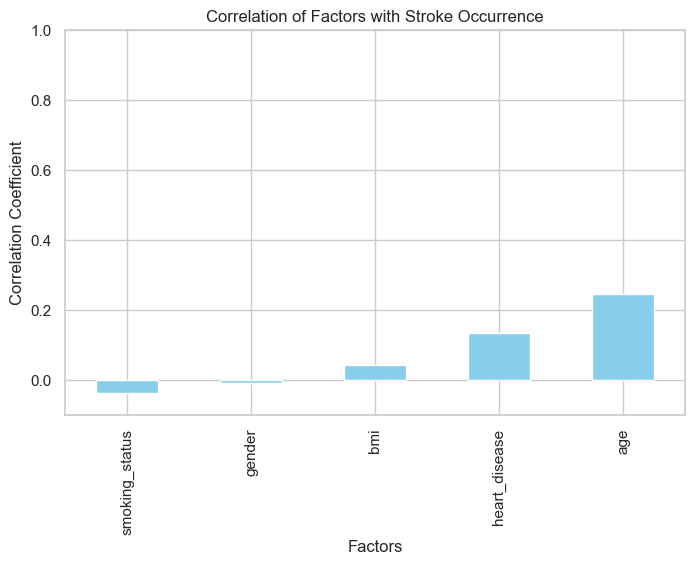

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('stroke-data.csv') # read

data = data[['gender', 'age', 'smoking_status', 'heart_disease', 'bmi', 'stroke']] # choose relevant columns

data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2}) # substitute missing gender 
data['smoking_status'] = data['smoking_status'].map({ # replace missing smoking status with numerical values
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
})

corr_matrix = data.corr() # correlation matrix, ie compute correlation between columns of our data

stroke_corr = corr_matrix['stroke'].drop('stroke').sort_values(ascending=True) # drop/remove unecessary rows or columns from our dataframe matrix corr_matrix
# and show correlation with having a stroke and then finally sort

sns.set_style(style="whitegrid") # set style of chart

plt.figure(figsize=(8,5)) # create bar plot with some dimensions 
stroke_corr.plot(kind='bar', color='skyblue') # characteristics of plot

plt.title('Correlation of Factors with Stroke Occurrence')
plt.xlabel('Factors')
plt.ylabel('Correlation Coefficient')
plt.ylim(-0.1, 1)

# Display the plot
plt.show()

The conclusion that age is the main factor of stroke since it has the highest correlation coefficient with respect to having stroke can be drawn due to having the highest correlation coefficient, somewhere around 0.25. While we maybe cannot really draw a definite conclusion since we excluded some of the columns provided to us we can with regard to these factors draw the conclusion that previous heart disease and age certainly imply a higher chance of stroke. 